In [2]:
import plotly.express as px
import pandas as pd
import tinkoffpy as tf
import plotly.graph_objects as go
from datetime import datetime, timedelta, date
import datetime
import plotly.figure_factory as ff
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

tf.auth_by_credentials(username='r.yunisov', password='Htyfn2002')


/Users/r.yunisov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
df_2 = tf.gp_to_df("""
SELECT *,
       DATE_TRUNC('week', crm_income_dt)::DATE AS crm_income_dt_week
FROM usr_wrk.ryunisov_nc_test_by_segments_0_1_d
WHERE crm_income_dt > '2023-06-28'
""", gp_service='sme')

df_2.head()

2023-08-03 17:37:59 - WARNING - Library version is outdated, you have: 1.0.44
actual version: 1.0.47, please, update library.
2023-08-03 17:53:00 - INFO - Query executed successfully. Result saved to DataFrame.


,groups_0d,groups_1d,party_rk_0d,party_rk_1d,segments_0d,segments_1d,integration_id,crm_income_dt,test_segments,decision_dt,utilization_dt,ident_flg,crm_income_dt_week
0,Тест,NaN,565236799,<NA>,segment_0_day,NaN,20230710112801339IBL881865,2023-07-10,segment_0_day_test,NaN,NaN,0,2023-07-10
1,Контроль,NaN,824839675,<NA>,segment_0_day,NaN,20230712123513796IBL857251,2023-07-12,segment_0_day_control,NaN,NaN,1,2023-07-10
2,Контроль,NaN,937818685,<NA>,segment_0_day,NaN,20230724130200309IBL531486,2023-07-24,segment_0_day_control,NaN,NaN,1,2023-07-24
3,Тест,Тест,426715995,426715995,segment_0_day,segment_1_day,20230720081502670IBL648791,2023-07-20,segment_0_1_test_test,NaN,NaN,1,2023-07-17
4,Тест,NaN,518555129,<NA>,segment_0_day,NaN,20230721083552055IBL313525,2023-07-21,segment_0_day_test,NaN,NaN,0,2023-07-17


In [5]:
df_2_con = df_2.groupby(['crm_income_dt','test_segments'], as_index=False)['integration_id', 'decision_dt', 'utilization_dt'].agg('count') \
    .rename(columns={'integration_id':'unique'})

df_2_con['cr_decision'] = df_2_con['decision_dt'] / df_2_con['unique'] * 100

df_2_con['cr_utilization'] = df_2_con['utilization_dt'] / df_2_con['decision_dt'] * 100

df_2_con['cr_utilization_by_total'] = df_2_con['utilization_dt'] / df_2_con['unique'] * 100

df_2_con = df_2_con.round(3)

df_2_con.query("test_segments in ('segment_0_1_control_control', 'segment_0_1_test_test')")

/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_26421/1681260895.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2_con = df_2.groupby(['crm_income_dt','test_segments'], as_index=False)['integration_id', 'decision_dt', 'utilization_dt'].agg('count') \


,crm_income_dt,test_segments,unique,decision_dt,utilization_dt,cr_decision,cr_utilization,cr_utilization_by_total
1,2023-06-29,segment_0_1_control_control,145,12,7,8.276,58.333,4.828
4,2023-06-29,segment_0_1_test_test,162,14,6,8.642,42.857,3.704
8,2023-06-30,segment_0_1_control_control,16,2,1,12.500,50.000,6.250
11,2023-06-30,segment_0_1_test_test,17,1,0,5.882,0.000,0.000
20,2023-07-04,segment_0_1_control_control,20,2,2,10.000,100.000,10.000
23,2023-07-04,segment_0_1_test_test,8,1,0,12.500,0.000,0.000
27,2023-07-05,segment_0_1_control_control,56,4,1,7.143,25.000,1.786
30,2023-07-05,segment_0_1_test_test,48,4,0,8.333,0.000,0.000
34,2023-07-06,segment_0_1_control_control,77,5,3,6.494,60.000,3.896
37,2023-07-06,segment_0_1_test_test,68,4,1,5.882,25.000,1.471


In [4]:
for_chart = df_2_con.replace({'non-selected':'Не попали в выборку', 
                                            'segment_0_1_control_control':'Контроль/контроль 0-1д',
                                            'segment_0_1_control_test':'Контроль/тест 0-1д',
                                            'segment_0_1_test_control':'Тест/контроль 0-1д',
                                            'segment_0_1_test_test':'Тест/тест 0-1д',
                                            'segment_0_day_control':'Контроль 0д',
                                            'segment_0_day_test':'Тест 0д',})

for_chart.rename(columns={
                          'cr_utilization_by_total':'%,Конверсия в утилизацию', 
                          'cr_decision':'%,Конверсия в открытие РКО', 
                          'unique':'Общее кол-во клиентов', 
                          'decision_dt':'Открытые РКО',
                          'utilization_dt':'Утил. счета',
                          'cr_utilization':'%,Конверсия в утил. из РКО',
                          'test_segments':'Группы выборок'	
                          },
                          inplace=True)

fig_1 = px.bar(for_chart, y='%,Конверсия в утилизацию', 
               x='Группы выборок',
               text='%,Конверсия в утилизацию', 
               title=f'Конверсия из общего попавших в выборку в утилизацию, %',
               labels={'Группы выборок':'Сегменты', 'value':'Конверсия'},
               barmode="group",
               height=700,
               width=1900,
               color_discrete_sequence=['goldenrod']

            )

fig_1.update_traces(textfont_size=19, textangle=0, textposition="outside", cliponaxis=False)
fig_1.show()

# fig_1.write_image("cr_in_utilization.png", width=1900, height=700)

fig_2 = px.bar(for_chart, y='%,Конверсия в открытие РКО', 
               x='Группы выборок',
               text='%,Конверсия в открытие РКО', 
               title=f'Конверсия в открытие РКО из общего кол-ва попавших в выборку, %',
               labels={'Группы выборок':'Сегменты', 'value':'Конверсия'},
               barmode="group",
               height=700,
               width=1900,
               color_discrete_sequence=['purple']
            )

fig_2.update_traces(textfont_size=19, textangle=0, textposition="outside", cliponaxis=False)
fig_2.show()

# fig_2.write_image("cr_in_rko.png", width=1900, height=700)

fig_3 = px.bar(for_chart, y='Общее кол-во клиентов', 
               x='Группы выборок',
               text='Общее кол-во клиентов', 
               title=f'Общее кол-во клиентов попавших в выборку',
               labels={'Группы выборок':'Сегменты', 'value':'Абсолютные значения'},
               barmode="group",
               height=700,
               width=1900,
               color_discrete_sequence=['green']
            )

fig_3.update_traces(textfont_size=19, textangle=0, textposition="outside", cliponaxis=False)
fig_3.show()

# fig_3.write_image("total_in_sample.png", width=1900, height=700)

fig_table = ff.create_table(for_chart)

for i in range(len(fig_table.layout.annotations)):
    fig_table.layout.annotations[i].font.size = 16

fig_table.show()

# fig_table.write_image("final_table.png", width=2000, height=700)

attach = ['cr_in_utilization.png', 'cr_in_rko.png', 'total_in_sample.png', 'final_table.png']

now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

text = f'Отчет по тесту коммуникаций на 0 и 1 день по новорегам @e.podolyako :alarmalarm: \n\nДанные актуальны на: **{now}**'

recipients = ['communication_test_reporting']

# tf.send_to_time(recipients, text, attach)

### Проверяем статистическую значимость по двум выборкам применяя критерии T-стьюдента и Манна-Уитни, а также метод бустрапа

/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_2839/971071952.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_2839/971071952.py:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_2839/971071952.py:32: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kerne

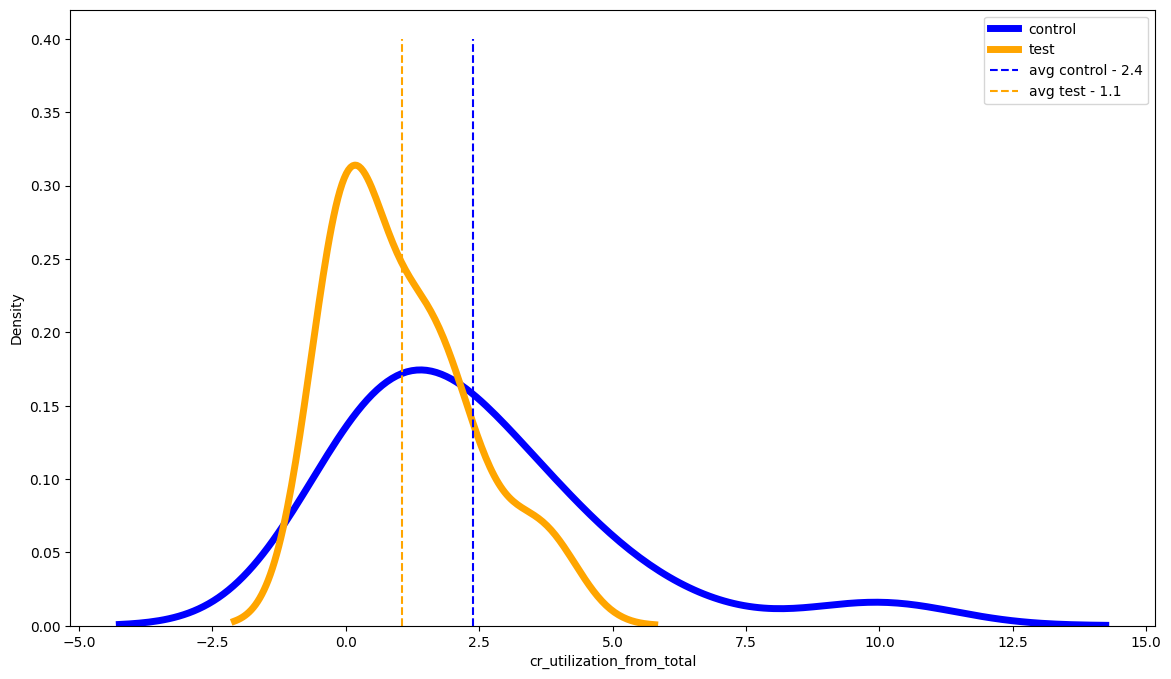

MannwhitneyuResult(statistic=107.5, pvalue=0.9766146235607125)


In [5]:
df_2_test = df_2.groupby(['crm_income_dt', 'test_segments'], as_index=False)['integration_id', 'decision_dt', 'utilization_dt'].agg('count') \
    .rename(columns={'integration_id':'unique'})

df_2_test['cr_decision'] = df_2_test['decision_dt'] / df_2_test['unique'] * 100

df_2_test['cr_utilization'] = df_2_test['utilization_dt'] / df_2_test['decision_dt'] * 100

df_2_test['cr_utilization_from_total'] = df_2_test['utilization_dt'] / df_2_test['unique'] * 100

df_2_test = df_2_test.round(3)

df_for_pv = df_2_test.fillna(0).query("test_segments in ('segment_0_1_control_control', 'segment_0_1_test_test')")

test = df_2_test.query("test_segments in ('segment_0_1_control_control', 'segment_0_1_test_test')")[['test_segments', 'cr_utilization_from_total', 'cr_decision']]

test[test['cr_utilization_from_total']>=0].groupby('test_segments')['cr_utilization_from_total'].mean()

control_control = df_for_pv.query("test_segments == 'segment_0_1_control_control'")['cr_utilization_from_total']
test_test = df_for_pv.query("test_segments == 'segment_0_1_test_test'")['cr_utilization_from_total']

control_avg = control_control.mean()

test_avg = test_test.mean()


plt.figure(figsize=(14,8))
sns.distplot(control_control, hist=False, kde=True, 
             bins=int(10/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5},
             label='control')
sns.distplot(test_test, hist=False, kde=True, 
             bins=int(10/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5},
             label='test')
plt.vlines(control_avg, ymax=0.4, ymin=0, linestyles='dashed', colors='blue', label=f'avg control - {control_avg:.1f}')
plt.vlines(test_avg, ymax=0.4, ymin=0, linestyles='dashed', colors = 'orange', label=f'avg test - {test_avg:.1f}')
plt.legend()
plt.show()

print(stats.mannwhitneyu(test_test, control_control, alternative='greater'))

### Смотрим p-value после трешхолда (отсечки) в +30

In [6]:
test_pv = df_for_pv.query("unique > 30")

control_control = test_pv.query("test_segments == 'segment_0_1_control_control'")['cr_utilization_from_total']
test_test = test_pv.query("test_segments == 'segment_0_1_test_test'")['cr_utilization_from_total']

print(stats.mannwhitneyu(test_test,control_control,alternative='greater'))

MannwhitneyuResult(statistic=73.5, pvalue=0.8758630970188379)


/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_2839/3727049561.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/r.yunisov/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='cr_utilization_from_total', ylabel='Density'>

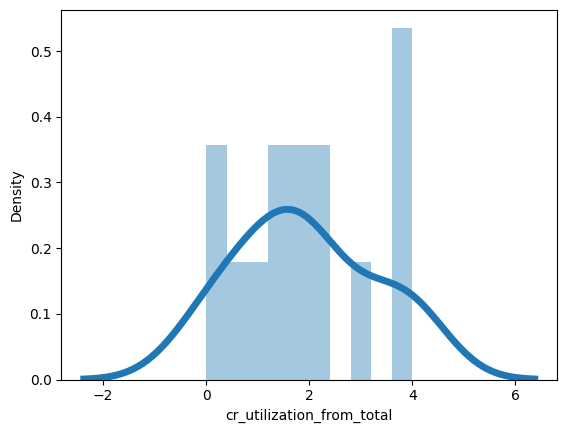

In [7]:
sns.distplot(control_control, hist = True, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 5},
                 label='test',
                 bins=10)

### Применяем центрально предельную теорему, чтобы оценить среднее и сравнить две выборки на большем кол-ве данных 


/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_2839/3964578412.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/r.yunisov/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/3g/twm5z59x18s28jmjj3c3ghfm0000gq/T/ipykernel_2839/3964578412.py:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

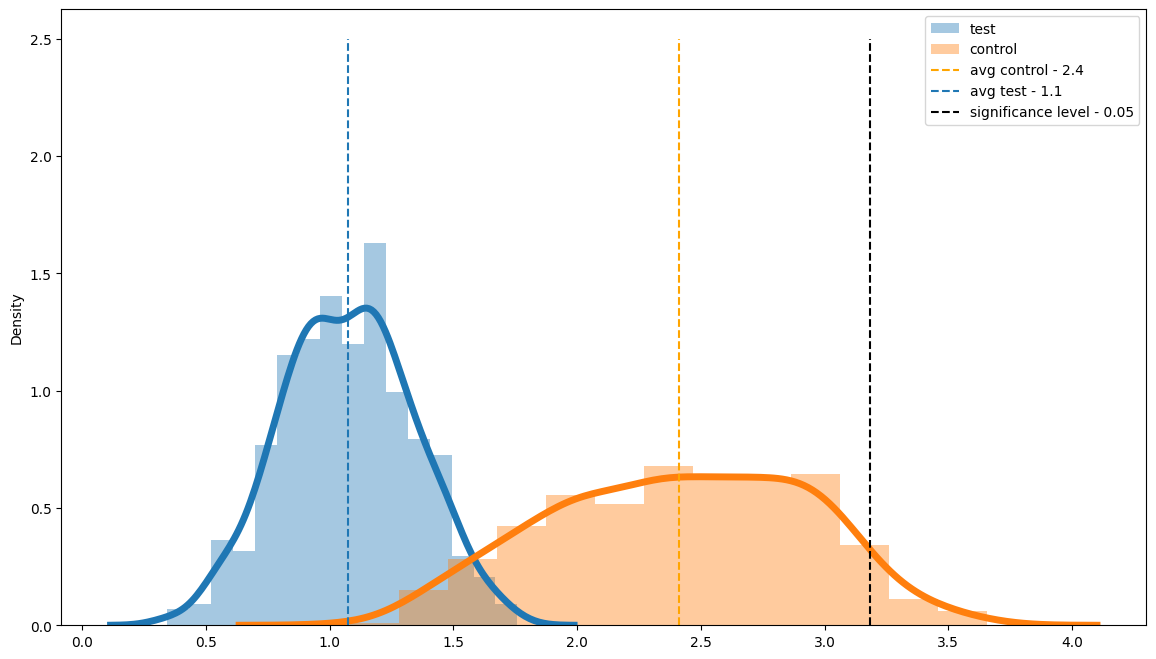

Ttest_indResult(statistic=-51.67007727658122, pvalue=1.0)


In [8]:
test_sample = []
control_sample = []

for i in range(500):
    test = df_for_pv.query("test_segments == 'segment_0_1_test_test'")['cr_utilization_from_total'].sample(10).mean()
    control = df_for_pv.query("test_segments == 'segment_0_1_control_control'")['cr_utilization_from_total'].sample(10).mean()

    test_sample.append(test)
    control_sample.append(control)

test_sample_mean = np.mean(test_sample)
control_sample_mean = np.mean(control_sample)

plt.figure(figsize=(14,8))

sns.distplot(test_sample, hist = True, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 5},
                 label='test')
sns.distplot(control_sample, hist = True, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 5},
                 label='control')

plt.fill_between(control_sample, 0)

plt.vlines(control_sample_mean, ymax=2.5, ymin=0, linestyles='dashed', colors='orange', label=f'avg control - {control_avg:.1f}')
plt.vlines(test_sample_mean, ymax=2.5, ymin=0, linestyles='dashed', label=f'avg test - {test_avg:.1f}')
plt.vlines(np.percentile(control_sample, 95), ymax=2.5, ymin=0, linestyles='dashed', colors='black', label=f'significance level - 0.05')

plt.legend()
plt.show()

print(stats.ttest_ind(test_sample, control_sample, alternative='greater'))